# Die Schweizer Bevölkerung stimmt mehrheitlich gleich ab wie der Bundesrat
## Variablen: br-pos, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/3961332422.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


(array([12539., 12570., 12600., 12631., 12662., 12692., 12723., 12753.,
        12784., 12815., 12843., 12874., 12904., 12935.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

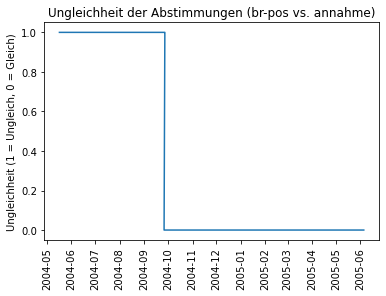

In [4]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'br-pos', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der br-pos 1 = Ja oder 2 = Nein
relevant_data = relevant_data[(relevant_data['br-pos'] == '1')|(relevant_data['br-pos'] == '2')]

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'br-pos':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# br-pos und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['br-pos'].replace({2: 0}, inplace=True)

# Wert für "Ungleichheit" bestimmen, hierzu subtrahieren wir einfach die Werte voneinander
# Bei einer Übereinstimmung erhalten wir dann den Wert 0 und bei einer Ungleichheit entweder denn Wert 1 oder -1
# Wir nehmen im jeden Fall den absoluten Wert dann erhalten wir immer 1, somit ist 0 = Übereinstimmung und 1 = Ungleichheit
relevant_data['br_pos_annahme_ungleichheit'] = (relevant_data['br-pos'] - relevant_data['annahme']).abs()

relevant_data = relevant_data[(relevant_data['datum'] > '2004-05-01') & (relevant_data['datum'] < '2005-08-01')]
x = relevant_data['datum']
y_svp = relevant_data['br_pos_annahme_ungleichheit']

fig, ax = plt.subplots()
ax.plot(x, y_svp)
ax.set(ylabel="Ungleichheit (1 = Ungleich, 0 = Gleich)", title="Ungleichheit der Abstimmungen (br-pos vs. annahme)")
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)


## Generierung CSV Datei

In [84]:
# Imports
import pandas as pd
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'br-pos', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'br-pos': 'br_pos'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der br-pos 1 = Ja oder 2 = Nein
relevant_data = relevant_data[(relevant_data['br_pos'] == '1')|(relevant_data['br_pos'] == '2')]

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'br_pos':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# br-pos und annahme die gleichen Zahlen für Ja und Nein benutzen
relevant_data['br_pos'].replace({2: 0}, inplace=True)

relevant_data.to_csv('./export/buibid_br_pos_annahme.csv', index=False)


/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/663603402.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Die Schweizer Bevölkerung stimmt über die Jahre ungleicher mit den Parteiparolen der SVP / SP ab.
## Variablen: p-svp, p-sp, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/1460593900.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


(array([12539., 12570., 12600., 12631., 12662., 12692., 12723., 12753.,
        12784., 12815., 12843., 12874., 12904., 12935.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

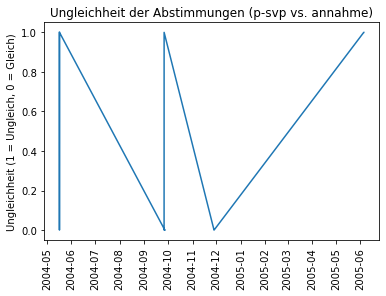

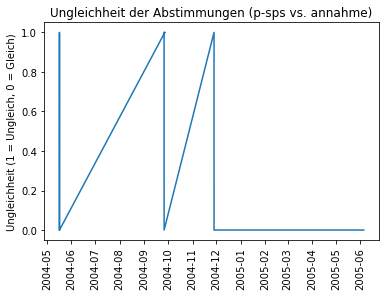

In [64]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'p-svp', 'p-sps', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der p-svp / p-sps 1 = Ja oder 2 = Nein
relevant_data = relevant_data[relevant_data['p-sps'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['p-sps'] == '1') | (relevant_data['p-sps'] == '2')] 

relevant_data = relevant_data[relevant_data['p-svp'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['p-svp'] == '1') | (relevant_data['p-svp'] == '2')] 

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[relevant_data['annahme'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['annahme'] == '0') | (relevant_data['annahme'] == '1')]

# In korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'p-svp':'int'})
relevant_data = relevant_data.astype({'p-sps':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# p-svp / p-sps und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['p-svp'].replace({2: 0}, inplace=True)
relevant_data['p-sps'].replace({2: 0}, inplace=True)


# Wert für "Ungleichheit" bestimmen, hierzu subtrahieren wir einfach die Werte voneinander
# Bei einer Übereinstimmung erhalten wir dann den Wert 0 und bei einer Ungleichheit entweder denn Wert 1 oder -1
# Wir nehmen im jeden Fall den absoluten Wert dann erhalten wir immer 1, somit ist 0 = Übereinstimmung und 1 = Ungleichheit
relevant_data['ungleichheit-svp'] = (relevant_data['p-svp'] - relevant_data['annahme']).abs()
relevant_data['ungleichheit-sps'] = (relevant_data['p-sps'] - relevant_data['annahme']).abs()

# Liniendiagramm zeichnen
relevant_data = relevant_data[(relevant_data['datum'] > '2004-05-01') & (relevant_data['datum'] < '2005-08-01')]
x = relevant_data['datum']
y_svp = relevant_data['ungleichheit-svp']

fig, ax = plt.subplots()
ax.plot(x, y_svp)
ax.set(ylabel="Ungleichheit (1 = Ungleich, 0 = Gleich)", title="Ungleichheit der Abstimmungen (p-svp vs. annahme)")
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)

y_sps = relevant_data['ungleichheit-sps']

fig, ax = plt.subplots()
ax.plot(x, y_sps)
ax.set(ylabel="Ungleichheit (1 = Ungleich, 0 = Gleich)", title="Ungleichheit der Abstimmungen (p-sps vs. annahme)")
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)


## Generierung CSV Datei

In [85]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'p-svp', 'p-sps', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'p-svp': 'p_svp'}, inplace=True)
relevant_data.rename(columns={'p-sps': 'p_sps'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der p-svp / p-sps 1 = Ja oder 2 = Nein
relevant_data = relevant_data[relevant_data['p_sps'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['p_sps'] == '1') | (relevant_data['p_sps'] == '2')] 

relevant_data = relevant_data[relevant_data['p_svp'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['p_svp'] == '1') | (relevant_data['p_svp'] == '2')] 

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[relevant_data['annahme'] != '.'].dropna()
relevant_data = relevant_data[(relevant_data['annahme'] == '0') | (relevant_data['annahme'] == '1')]

# In korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'p_svp':'int'})
relevant_data = relevant_data.astype({'p_sps':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# p-svp / p-sps und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['p_svp'].replace({2: 0}, inplace=True)
relevant_data['p_sps'].replace({2: 0}, inplace=True)

relevant_data.to_csv('./export/buibid_p_svp_p_sps_annahme.csv', index=False)

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/3644685992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Die Schweizer Bevölkerung ist ablehnend gegenüber einer Initiative/Referendum, wenn die Medienberichterstattung mehrheitlich ablehnend ist.
## Variablen: mediaton-tot, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/3842850306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


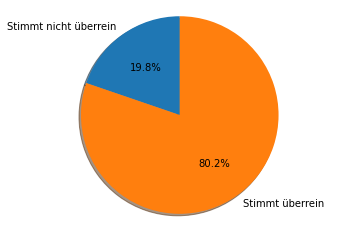

In [82]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'mediaton-tot', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Filtern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# Herausfiltern der mediaton-tot (es gibt Werte mit '.' oder ganz leer, welche wir nicht wollen)
relevant_data = relevant_data[relevant_data['mediaton-tot'] != '.']

# mediaton-tot sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'mediaton-tot':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# Alle Annahmen welche Nein sind (0) durch den Wert -1 ersetzen
# Folgende Ergebnisse sollten dann rauszulesen sein:
	# A. Berichterstattung positiv "mediaton_tot" * annahme positiv = n>0 * 1 = positive zahl
	# B. Berichterstattung positiv "mediaton_tot" * annahme negativ = n>0 * -1 (anstatt 0) = negative Zahl
	# C. Berichterstattung negativ "mediaton_tot" * annahme positiv = n<0 * 1 = negative Zahl
	# D. Berichterstattung negativ "mediaton_tot" * annahme negativ = n<0 * -1 (anstatt 0) = positive Zahl

relevant_data['annahme'].replace({0: -1}, inplace=True)

relevant_data['gleichheit'] = relevant_data['mediaton-tot'] * relevant_data['annahme']
yes_percentage = len(relevant_data[relevant_data['gleichheit'] >= 0])
no_percentage = len(relevant_data[relevant_data['gleichheit'] < 0])

# Kuchendiagramm zeichnen
labels = 'Stimmt nicht überrein', 'Stimmt überrein'
sizes = [no_percentage, yes_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Generierung CSV Datei

In [1]:
# Imports
import pandas as pd
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'mediaton-tot', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'mediaton-tot': 'mediaton_tot'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie mediaton_tot mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['mediaton_tot'] != '.')&(relevant_data['annahme'] != '.')].dropna()

# mediaton-tot sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'mediaton_tot':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# Alle Annahmen welche Nein sind (0) durch den Wert -1 ersetzen
# Folgende Ergebnisse sollten dann rauszulesen sein:
	# A. Berichterstattung positiv "mediaton_tot" * annahme positiv = n>0 * 1 = positive zahl
	# B. Berichterstattung positiv "mediaton_tot" * annahme negativ = n>0 * -1 (anstatt 0) = negative Zahl
	# C. Berichterstattung negativ "mediaton_tot" * annahme positiv = n<0 * 1 = negative Zahl
	# D. Berichterstattung negativ "mediaton_tot" * annahme negativ = n<0 * -1 (anstatt 0) = positive Zahl

relevant_data['annahme'].replace({0: -1}, inplace=True)


relevant_data.to_csv('./export/buibid_mediaton_tot_annahme.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/ds/f3lvjky16mlc3bjs6fxxd6d80000gn/T/ipykernel_7960/1520636850.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Es gibt einen Zusammenhang zwischen dem Ja-Anteil der Abstimmungsresultate und der Anzahl des Ja-Anteils an Inseraten in Printmedien.
## Variablen: annahme, inserate-ja

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/3275397371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


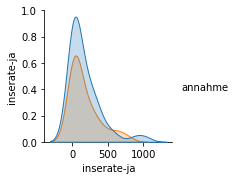

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'inserate-ja', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Filtern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# Herausfilter der inserate-ja mit '.'
relevant_data = relevant_data[(relevant_data['inserate-ja'] != '.')].dropna()

relevant_data = relevant_data.astype({'inserate-ja':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

sns.pairplot(relevant_data, hue = 'annahme')

## Generierung CSV Datei

In [87]:
# Imports
import pandas as pd
import numpy as np
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'inserate-ja', 'inserate-nein', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'inserate-ja': 'inserate_ja'}, inplace=True)
relevant_data.rename(columns={'inserate-nein': 'inserate_nein'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie br_pos mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['inserate_ja'] != '.')&(relevant_data['inserate_nein'] != '.')&(relevant_data['annahme'] != '.')].dropna()


relevant_data = relevant_data.astype({'inserate_ja':'int'})
relevant_data = relevant_data.astype({'inserate_nein':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

relevant_data.to_csv('./export/buibid_inserate_annahme.csv', index=False)

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1335/1965533801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")
